# Note:
    Check Subsequnce based CPD solution.

# Import libs

In [2]:
import sys
sys.path.append("../..")

In [3]:
from data.SythData import LinearSteps, SinusoidWaves
from models.SubspaceBased import SingularSequenceTransformer


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Generate data

In [49]:
# data = LinearSteps(length_data=2000, cps_number=5, white_noise_level="default").get()
data = SinusoidWaves(length_data=1000, cps_number=2, white_noise_level="default").get()

<Axes: xlabel='time'>

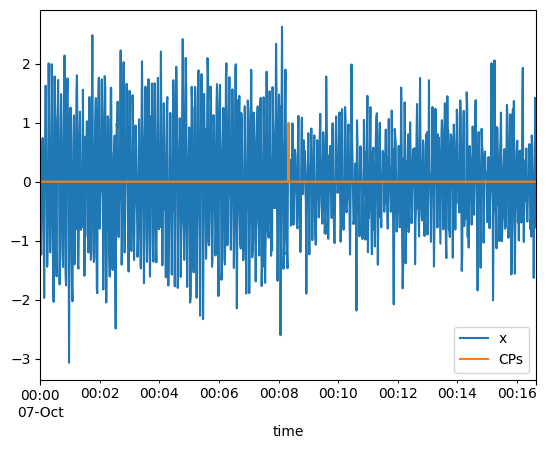

In [50]:
data.plot()

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 1999-10-07 00:00:00 to 1999-10-07 00:16:39
Freq: S
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   CPs     1000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.4 KB


# Init model

In [94]:
model = SingularSequenceTransformer(df=data, target_column="x",
                     sequence_window = 50,
                     lag = 5,
                     queue_window=25,
                     is_cps_filter_on=False,
                     n_components=1,
                     threshold_std_coeff=3.1)

In [95]:
distances = model.get_distances()

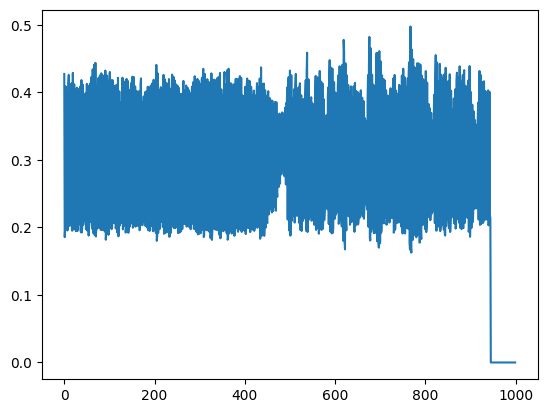

In [98]:
plt.plot(distances)

In [91]:
distances[:100].mean() + distances[:100].std()*3.61

0.6536921360152297

In [92]:
cps_pred = model.predict()

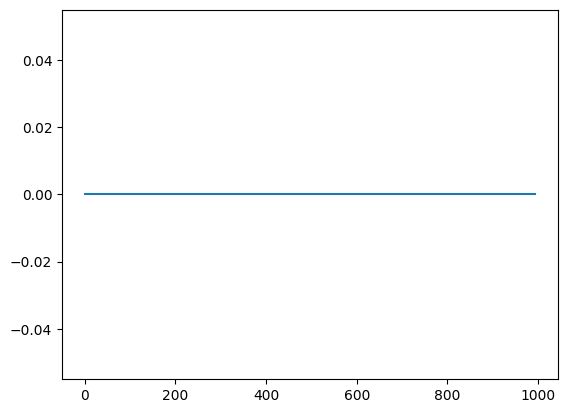

In [93]:
plt.plot(cps_pred)